# Лабораторная работа №6

Маратова Диана AIN-2-21

In [100]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score

In [105]:
breast = load_breast_cancer()

ridge = Ridge(alpha=0.01,max_iter=1000)

scores = cross_val_score(ridge, breast.data, breast.target, cv = 5)
print(scores)
scores.mean()

[0.63527105 0.69531944 0.76818952 0.77835416 0.65915521]


0.7072578758818887

In [74]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [77]:
print(cross_val_score(ridge, breast.data, breast.target, cv = kfold))

0.7412428449957562


In [76]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5,n_splits=10)
scores = cross_val_score(ridge, breast.data, breast.target, cv=shuffle_split)
print(scores.mean())

0.7384583258234448


In [78]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(breast.data,breast.target,random_state=0)
print(X_train.shape[0], X_test.shape[0])
best_score = 0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train,y_train)
        score = svm.score(X_test,y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C':C,'gamma':gamma}

print("наилучшее значение правильности: {:.2f}".format(best_score))
print("наилучшее значение параметров: {}".format(best_parameters)) 



426 143
наилучшее значение правильности: 0.93
наилучшее значение параметров: {'C': 1, 'gamma': 0.001}


In [79]:
from sklearn.svm import SVC 
X_trainval, X_test, y_trainval, y_test = train_test_split(breast.data, breast.target, random_state=0) 
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1) 
print("Размер обучающего набора: {} размер проверочного набора: {} размер тестового набора:" " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0])) 
 
best_score = 0 
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:     
    for C in [0.001, 0.01, 0.1, 1, 10, 100]: 
        svm = SVC(gamma=gamma, C=C)         
        svm.fit(X_train, y_train) 
        score = svm.score(X_valid, y_valid) 
        if score > best_score:             
            best_score = score 
            best_parameters = {'C': C, 'gamma': gamma} 
svm = SVC(**best_parameters) 
svm.fit(X_trainval, y_trainval) 
test_score = svm.score(X_test, y_test) 
print("Лучшее значение правильности на проверочном наборе: {:.2f}".format(best_score)) 
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.2f}".format(test_score)) 

Размер обучающего набора: 319 размер проверочного набора: 107 размер тестового набора: 143

Лучшее значение правильности на проверочном наборе: 0.94
Наилучшие значения параметров:  {'C': 1, 'gamma': 0.001}
Правильность на тестовом наборе с наилучшими параметрами: 0.93


In [81]:
import numpy as np

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:     
    for C in [0.001, 0.01, 0.1, 1, 10, 100]: 
        svm = SVC(gamma=gamma, C=C)         
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores) 
        if score > best_score:             
            best_score = score 
            best_parameters = {'C': C, 'gamma': gamma} 
svm = SVC(**best_parameters) 
svm.fit(X_trainval, y_trainval) 


SVC(C=1, gamma=0.001)

In [84]:
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
print(param_grid)

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(breast.data, breast.target, random_state=0)


In [87]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [88]:
print(grid_search.score(X_test,y_test))

0.9300699300699301


In [89]:
import pandas as pd 
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.034505,0.003242,0.023055,0.011759,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
1,0.014573,0.003563,0.015476,0.008696,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
2,0.011721,0.003107,0.007948,0.003381,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
3,0.027434,0.009144,0.012894,0.003083,0.001,1,"{'C': 0.001, 'gamma': 1}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
4,0.024792,0.005814,0.017517,0.005716,0.001,10,"{'C': 0.001, 'gamma': 10}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6


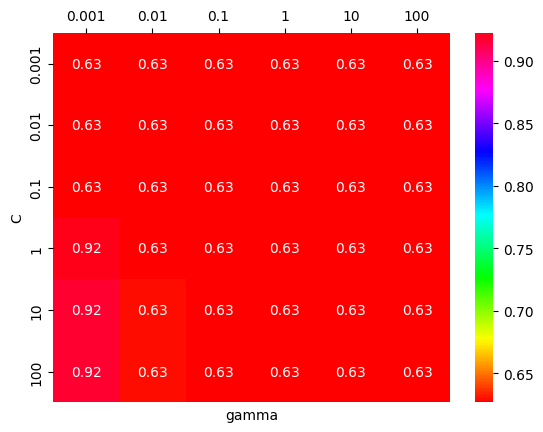

In [90]:
import seaborn as sns 
import matplotlib.pyplot as plt
scores = np.array(results.mean_test_score).reshape(6,6)
ax = sns.heatmap(scores, annot=True,xticklabels=param_grid['gamma'],yticklabels=param_grid['C'],cmap='hsv')
ax.set(xlabel = "gamma", ylabel = "C")
ax.xaxis.tick_top()

plt.show()

In [91]:
param_grid = [{'kernel':['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
               {'kernel':['linear'],
                'C':[0.001, 0.01, 0.1, 1, 10, 100],
                'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}]
print("list :\n{}".format(param_grid))

list :
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [92]:
results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.034505,0.003242,0.023055,0.011759,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
1,0.014573,0.003563,0.015476,0.008696,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
2,0.011721,0.003107,0.007948,0.003381,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
3,0.027434,0.009144,0.012894,0.003083,0.001,1,"{'C': 0.001, 'gamma': 1}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
4,0.024792,0.005814,0.017517,0.005716,0.001,10,"{'C': 0.001, 'gamma': 10}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6


In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Предсказания модели
predictions = grid_search.predict(X_test)

# Вычисление метрик
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9300699300699301
Precision: 0.9545454545454546
Recall: 0.9333333333333333
F1 Score: 0.9438202247191012


<br><h1>Свой датасет
   

In [53]:
import pandas as pd
import random
# a) Создать свой датасет с категориальными данными (1000 строк), которые содержат следующие поля: 
# (salary, city, age, vacation_prefer, transport_prefer, target). Применить import random (random. choice, random.randint) 
columns=['salary', 'city', 'age', 'vacation_prefer', 'transport_prefer', 'target']
data = []
for _ in range(1000):
    # b) Salary – установить числовой тип (например 50000), 
    salary = random.randint(50000, 100000)
    # city – город проживания (например, Bishkek), 
    city = random.choice(['Bishkek', 'Turkey', 'Germany', 'Moscow', 'New York', 'Paris'])
    # age – возраст (например, от 30 до 65), 
    age = random.randint(30, 65)
    # vacation_prefer – тип отдыха (например, Shopping или Beach holiday), 
    vacation_prefer = random.choice(['Shopping', 'Beach holiday'])
    # transport_prefer – тип транспорта (например, auto, plane),
    transport_prefer = random.choice(['auto', 'plane'])
    # target – город, в котором проведем отпуск (например, London, Moscow)
    target = random.choice(['Bishkek', 'Turkey', 'Germany', 'Moscow', 'New York', 'Paris'])

    data.append([salary, city, age, vacation_prefer, transport_prefer, target])

df = pd.DataFrame(data, columns=columns)
df

,salary,city,age,vacation_prefer,transport_prefer,target
0,88163,New York,49,Beach holiday,plane,Paris
1,93838,Paris,49,Shopping,plane,Turkey
2,98955,Germany,62,Beach holiday,auto,Turkey
3,78625,Moscow,36,Beach holiday,plane,Paris
4,87399,Turkey,33,Shopping,auto,Turkey
...,...,...,...,...,...,...
995,80698,Bishkek,36,Beach holiday,plane,Germany
996,76699,Germany,44,Shopping,auto,Germany
997,51912,Turkey,34,Beach holiday,plane,Turkey
998,98929,Bishkek,54,Shopping,auto,Bishkek


In [54]:
# Преобразовать категориальные данные в числовые, используя panadas.get_dummies.
df = pd.get_dummies(df, columns=['city', 'vacation_prefer', 'transport_prefer'])
df
                    

,salary,age,target,city_Bishkek,city_Germany,city_Moscow,city_New York,city_Paris,city_Turkey,vacation_prefer_Beach holiday,vacation_prefer_Shopping,transport_prefer_auto,transport_prefer_plane
0,88163,49,Paris,False,False,False,True,False,False,True,False,False,True
1,93838,49,Turkey,False,False,False,False,True,False,False,True,False,True
2,98955,62,Turkey,False,True,False,False,False,False,True,False,True,False
3,78625,36,Paris,False,False,True,False,False,False,True,False,False,True
4,87399,33,Turkey,False,False,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,80698,36,Germany,True,False,False,False,False,False,True,False,False,True
996,76699,44,Germany,False,True,False,False,False,False,False,True,True,False
997,51912,34,Turkey,False,False,False,False,False,True,True,False,False,True
998,98929,54,Bishkek,True,False,False,False,False,False,False,True,True,False


In [57]:
# Выделить обучающую выборку и тестовую выборку (X_train, y_train, X-test, y_test)
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Выбрать модель классификатор (например, from sklearn.ensemble import RandomForestClassifier)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
# Проверить оценку модели.
accuracy = classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.175


In [65]:
# Сделать предсказание на случайных данных.
random_salary = 50000
random_city = random.choice(['Bishkek', 'London', 'Moscow', 'New York'])
random_age = random.randint(30, 65)
random_vacation_prefer = random.choice(['Shopping', 'Beach holiday'])
random_transport_prefer = random.choice(['auto', 'plane'])

random_data = pd.DataFrame({
    'salary': [random_salary],
    'city': [random_city],
    'age': [random_age],
    'vacation_prefer': [random_vacation_prefer],
    'transport_prefer': [random_transport_prefer]
})

random_data_encoded = pd.get_dummies(random_data, columns=['city', 'vacation_prefer', 'transport_prefer'])

missing_cols = set(X_train.columns) - set(random_data_encoded.columns)
for col in missing_cols:
    random_data_encoded[col] = 0

random_features = random_data_encoded.reindex(columns=X_train.columns, fill_value=0)

prediction = classifier.predict(random_features)
print("Prediction:", prediction)

Prediction: ['Turkey']
